100%|██████████| 100000/100000 [00:42<00:00, 2379.44it/s]


Text(0, 0.5, '$\\sigma$')

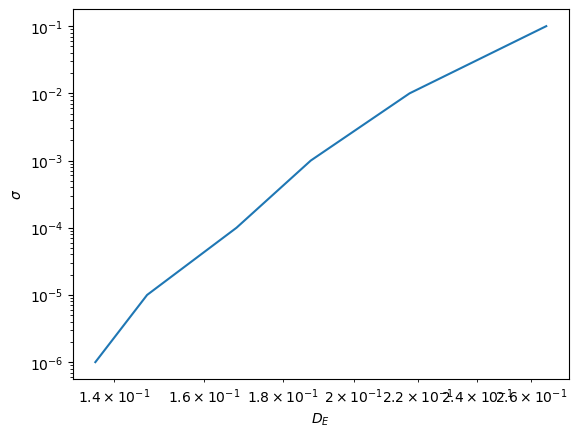

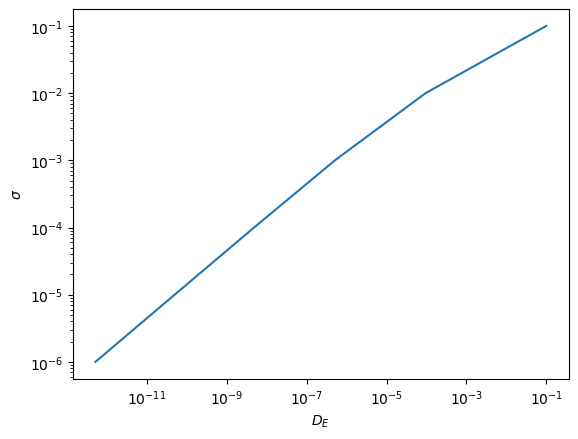

In [15]:
import numpy as np
from tqdm.auto import trange
import matplotlib.pyplot as plt

def euler_marayuma(f, tspan, h, initial, num_trials=1):
    t = np.arange(start=tspan[0], stop=tspan[1]+h/2, step=h).reshape(-1,1)
        
    n, _ = initial.shape
    nt, _ = t.shape 
    arr_sol = initial + np.zeros((n,num_trials))

    for i in trange(nt-1):
        arr_gaunoise = (h**0.5)*np.random.randn(n, num_trials)
        arr_sol = arr_sol + f(arr_sol, h, arr_gaunoise)
    
    return arr_sol

def symplectic_splitting(f, tspan, h, initial, num_trials=1):
    t = np.arange(start=tspan[0], stop=tspan[1]+h/2, step=h).reshape(-1,1)
        
    n, _ = initial.shape
    nt, _ = t.shape 
    arr_sol = initial + np.zeros((n,num_trials))

    for i in trange(nt-1):
        arr_gaunoise = (h**0.5)*np.random.randn(n, num_trials)
        arr_sol = arr_sol + f(arr_sol, h, arr_gaunoise)
    
    return arr_sol



def f(x, dt, sigma, dW):
    return np.array([-np.sin(x[1,:])*dt + sigma*dW[0,:], np.sin(x[0,:])*dt + sigma*dW[1,:]])

def f_ss(x,dt,sigma,dW):
    return np.array([-np.sin(x[1,:])*dt + sigma*dW[0,:], np.sin(x[0,:]- 
        np.sin(x[1,:])*dt)*dt + sigma*dW[1,:]])

arr_sigmas = 10**np.linspace(start=-1,stop=-6, num=6)
h = 0.05
num_trials = 5000
T = 5000
tspan = [0,T]
initial = np.zeros((2,1))

arr_DE = np.zeros((arr_sigmas.shape[0],))
for sigma, i in zip(arr_sigmas, range(arr_sigmas.shape[0])):
    sol = euler_marayuma(lambda x, dt, dW: f(x,dt,sigma,dW), 
        tspan, h, initial, num_trials=num_trials)
    
    arr_DE[i] = np.mean(np.power(sol[0,:],2),axis=0)/(2*T)
plt.figure()
plt.loglog(arr_DE, arr_sigmas,'+')
plt.xlabel(r'$D_E$')
plt.ylabel(r'$\sigma$')

arr_DE = np.zeros((arr_sigmas.shape[0],))
for sigma, i in zip(arr_sigmas, range(arr_sigmas.shape[0])):
    sol = symplectic_splitting(lambda x, dt, dW: f_ss(x,dt,sigma,dW), 
        tspan, h, initial, num_trials=num_trials)
    
    arr_DE[i] = np.mean(np.power(sol[0,:],2),axis=0)/(2*T)

plt.figure()
plt.loglog(arr_DE, arr_sigmas,'+')
plt.xlabel(r'$D_E$')
plt.ylabel(r'$\sigma$')










[4.74514281e-01 3.99319779e-02 1.03740083e-05 1.00718285e-07
 1.03491203e-09 9.65147517e-12]
[5.e-03 5.e-05 5.e-07 5.e-09 5.e-11 5.e-13]


<Figure size 640x480 with 0 Axes>

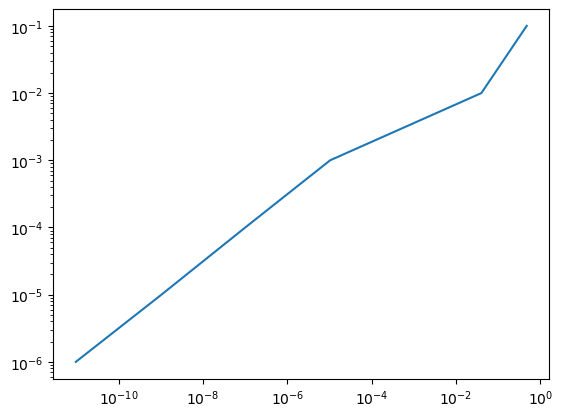

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
print(arr_DE)
print(0.5*(arr_sigmas**2))

plt.loglog(arr_DE, arr_sigmas)

plt.figure()